# TP Introduction à l'optimisation non linéaire
Alexandre Castanié

---

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

### 1. Optimisation sans contraintes

#### Task 1 - Oracles

Nous allons commencer par implémenter 3 oracles renvoyants l'image et le gradient de ces trois fonctions:

$$ f_1(x_1,x_2)=x_1^2+x_2^2-2x_1x_2 $$
$$ f_2(x_1,x_2)=10(x_2-x_1^2)^2+(1-x_1)^2$$
$$ f_3(x)=\frac{1}{2} \|x\| ^2$$

$f_1$ et $f_2$ sont de classe $C^1$ sur $\mathbb{R} ^2$ et $f_3$ est de classe $C^1$ sur $\mathbb{R} ^n$.  
Ces fonctions sont donc différenciables et :

$$ \overrightarrow{grad} f_1=(2(x_1-x_2),2(x_2-x_1))$$
$$ \overrightarrow{grad} f_2=(-40x_1(x_2-x_1^2)-2(1-x_1),20(x_2-x_1^2)) $$
$ f_3(x)=\frac{1}{2} \|x\| ^2 = \frac{1}{2} \sum_{i=1}^n x_i^2$ par définition de la norme usuelle donc :
$$ \overrightarrow{grad} f_3=(x_1,x_2,...,x_n)=x $$



- fonction $f_1$

In [2]:
def oracle1(x,mode):
    if mode==1:
        return x[0]**2+x[1]**2-2*x[0]*x[1]
    elif mode==2:
        return x[0]**2+x[1]**2-2*x[0]*x[1],[2*(x[0]-x[1]),2*(x[1]-x[0])]
    elif mode==3:
        return [2*(x[0]-x[1]),2*(x[1]-x[0])]


In [3]:
x1 = np.linspace(-100, 100, 100)
x2 = np.linspace(-100, 100, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = oracle1([X1,X2],1)
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title("fonction f1", fontsize = 13)
ax.set_xlabel('x1', fontsize = 11)
ax.set_ylabel('x2', fontsize = 11)
ax.set_zlabel('y', fontsize = 10)
plt.show()

<IPython.core.display.Javascript object>

- fonction $f_2$

In [4]:
def oracle2(x,mode):
    if mode==1:
        return 10*(x[1]-x[0]**2)**2+(1-x[0])**2
    elif mode==2:
        return 10*(x[1]-x[0]**2)**2+(1-x[0])**2,[-40*x[0]*(x[1]-x[0]**2)-2*(1-x[0]),20*(x[1]-x[0]**2)]
    elif mode==3:
        return [-40*x[0]*(x[1]-x[0]**2)-2*(1-x[0]),20*(x[1]-x[0]**2)]


In [5]:
x21 = np.linspace(-100, 100, 100)
x22 = np.linspace(-100, 100, 100)
X21, X22 = np.meshgrid(x21, x22)
Y2 = oracle2([X21,X22],1)
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X21, X22, Y2, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title("fonction f2", fontsize = 13)
ax.set_xlabel('x1', fontsize = 11)
ax.set_ylabel('x2', fontsize = 11)
ax.set_zlabel('y', fontsize = 10)
plt.show()

<IPython.core.display.Javascript object>

- focntion $f_3$

In [6]:
def oracle3(x,mode):
    if mode==1:
        return 0.5*sum(i**2 for i in x)
    elif mode==2:
        return 0.5*sum(i**2 for i in x),x
    elif mode==3:
        return x

In [7]:
x31 = np.linspace(-100, 100, 100)
x32 = np.linspace(-100, 100, 100)
X31, X32 = np.meshgrid(x31, x32)
Y3 = oracle3([X31,X32],1)
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X31, X32, Y3, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title("fonction f3 pour n=2", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('z', fontsize = 10)
plt.show()

<IPython.core.display.Javascript object>

#### Task 2 - Méthode du gradient

La méthode du gradient basique (sans normalisation ou pré-conditionnement) consiste à établir la direction de descente comme l'opposée du gradient. En effet, nous allons calculer pour chaque itération $k \in [\!1,...,M\!] $ :
$$ x^{k+1}=x^{k}-t \nabla f(x^k)$$
La condition d'arrêt s'écrit :
$$ \| \nabla f(x^k)\| \le 10^{-6} $$

On commence avec les données suivantes :  
M=1000 le maximum d'itérations  
t=0.5 le pas  
$x^0 =(1,...,1)$ la valeur de x pour k=0

In [8]:
def GradientMethod(oracle,x0,t,M):
    x=np.array(x0)
    a=0
    g=np.array(oracle(x0,3))
    while sum(np.abs(g))>10**(-6):     #norme 1 utilisée, cela ne change pas le résultat
        x=x-t*g
        g=np.array(oracle(x,3))
        if a>=M:
            break
        else:
            a+=1
    return x,a,sum(np.abs(g))

In [9]:
#Données
M=1000
t=0.5

1. Tests avec un x de dimensions 2

In [10]:
x_f1,Nb,ngrad=GradientMethod(oracle1,[1,1],t,M)
print(f"x trouvé = {x_f1}",f"\nNombre d'itérations = {Nb}", f"\nValeur de la norme du gradient = {ngrad}")

x trouvé = [1 1] 
Nombre d'itérations = 0 
Valeur de la norme du gradient = 0


Résultat logique puisque $\nabla f_1((1,1))=(0,0)$

In [11]:
x_f2,Nb2,ngrad2=GradientMethod(oracle2,[1,1],t,M)
print(f"x trouvé = {x_f2}",f"\nNombre d'itérations = {Nb2}",f"\nValeur de la norme du gradient = {ngrad2}")

x trouvé = [1 1] 
Nombre d'itérations = 0 
Valeur de la norme du gradient = 0


Même conclusion qu'au résultat précédent

In [12]:
def GradientMethodbis(oracle,x0,t,M):
    xsol=[x0]
    x=np.array(x0)
    a=0
    g=np.array(oracle(x0,3))
    while sum(np.abs(g))>10**(-6):
        x=x-t*g
        g=np.array(oracle(x,3))
        if a>=M:
            break
        else:
            a+=1
        xsol.append(x)
        
    return x,a,sum(np.abs(g)),xsol

In [13]:
x_f3,Nb3,ngrad3,xsol=GradientMethodbis(oracle3,[1,1],t,M)
print(f"x trouvé = {x_f3}",f"\nNombre d'itérations = {Nb3}",f"\nValeur de la norme du gradient = {ngrad3}")

x trouvé = [4.76837158e-07 4.76837158e-07] 
Nombre d'itérations = 21 
Valeur de la norme du gradient = 9.5367431640625e-07


In [14]:
#Tracé des x à chaque itération
xsolx=[xsol[i][0] for i in range(len(xsol))]
xsoly=[xsol[i][1] for i in range(len(xsol))]
ysol=[oracle3(xsol[i],1) for i in range(len(xsol))]
x321 = np.linspace(-1, 1, 50)
x322 = np.linspace(-1, 1, 50)
X321, X322 = np.meshgrid(x321, x322)
Y32 = oracle3([X321,X322],1)
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X321, X322, Y32, rstride=1, cstride=1, edgecolor='none')
ax.scatter(xsolx, xsoly, ysol, c='red', linewidth=2, label="x descente de gradient")
ax.set_title("fonction f3 pour n=2", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('z', fontsize = 10)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

2. Tests pour $f_3$ avec n=10 puis n=10000

In [15]:
#n=10
x0=[1 for i in range(10)]
x_f3,Nb3,ngrad3=GradientMethod(oracle3,x0,t,M)
print(f"Les 4 premières valeurs du x trouvé = {x_f3[0:4]}",f"\nNombre d'itérations = {Nb3}",f"\nValeur de la norme du gradient = {ngrad3}")

Les 4 premières valeurs du x trouvé = [5.96046448e-08 5.96046448e-08 5.96046448e-08 5.96046448e-08] 
Nombre d'itérations = 24 
Valeur de la norme du gradient = 5.960464477539062e-07


In [16]:
#n=10000
x0=[1 for i in range(10000)]
x_f3,Nb3,ngrad3=GradientMethod(oracle3,x0,t,M)
print(f"Les 4 premières valeurs du x trouvé = {x_f3[0:4]}",f"\nNombre d'itérations = {Nb3}",f"\nValeur de la norme du gradient = {ngrad3}")

Les 4 premières valeurs du x trouvé = [5.82076609e-11 5.82076609e-11 5.82076609e-11 5.82076609e-11] 
Nombre d'itérations = 34 
Valeur de la norme du gradient = 5.820766091346741e-07


On remarque plusieurs choses lorsque n augmente:
- le nombre d'itérations augmente (sans relation de linéarité).
- le x trouvé se rapproche de 0
- la norme du gradient se rapproche de $10^{-6}$

3. Test avec t=0.01

In [17]:
#n=10 et t=0.01
x0=[1 for i in range(10)]
x_f3,Nb3,ngrad3=GradientMethod(oracle3,x0,0.01,M)
print(f"Les 4 premières valeurs du x trouvé = {x_f3[0:4]}",f"\nNombre d'itérations = {Nb3}",f"\nValeur de la norme du gradient = {ngrad3}")

Les 4 premières valeurs du x trouvé = [4.27395349e-05 4.27395349e-05 4.27395349e-05 4.27395349e-05] 
Nombre d'itérations = 1000 
Valeur de la norme du gradient = 0.0004273953493655172


In [18]:
#n=10000 et t=0.01
x0=[1 for i in range(10000)]
x_f3,Nb3,ngrad3=GradientMethod(oracle3,x0,0.01,M)
print(f"Les 4 premières valeurs du x trouvé = {x_f3[0:4]}",f"\nNombre d'itérations = {Nb3}",f"\nValeur de la norme du gradient = {ngrad3}")

Les 4 premières valeurs du x trouvé = [4.27395349e-05 4.27395349e-05 4.27395349e-05 4.27395349e-05] 
Nombre d'itérations = 1000 
Valeur de la norme du gradient = 0.4273953493655329


Avec t = 0.01, le nombre d'itérations a explosé jusqu'à atteindre son maximum imposé. Cela indique que le pas est trop petit.

#### Task 3 - Règle d'Armijo

La règle d'Armijo consiste à trouver une valeur d'un pas à effectuer le long d'une direction de descente qui respecte la condition suivante :
$$f(x^k+t_pd^k) \le f(x^k)+m_1t_p \nabla f(x^k).d^k$$

Avec p le nombre d'itérations nécessaires pour trouver le pas.  
Tant que la condition n'est pas satisfaite, t sera réduit d'une proportion $\theta \in [0,1]$ :
$$t_{p+1}=\theta t_{p}$$

In [19]:
def t_Armijo(x,d,oracle):
    m1=0.001
    theta=0.2
    p=0
    t=0.5
    X=np.array(x)+t*np.array(d)
    while oracle(X,1)>oracle(x,1)+ m1*t*np.dot(oracle(x,3),np.array(d)):
        t*=theta
        if p>=50:
            break
        else:
            p+=1
    return t

#### Task 4 - Intégration de la règle d'Armijo dans la méthode du gradient

In [31]:
def GradientMethod2(oracle,x0,M):
    x=x0
    a=0
    g=np.array(oracle(x0,3))
    t=0.5
    while sum(np.abs(g))>10**(-6):
        d=-np.array(oracle(x,3))
        t=t_Armijo(x,d,oracle)
        x=x-t*g
        g=np.array(oracle(x,3))
        if a>=M:
            break
        else:
            a+=1
    return x,a,sum(np.abs(g))

In [21]:
#test sur f3
x_f3A,Nb3A,ngrad3A=GradientMethod2(oracle3,[1,1],M)
print(f"x trouvé = {x_f3A}",f"\nNombre d'itérations = {Nb3A}",f"\nValeur de la norme du gradient = {ngrad3A}")

x trouvé = [4.76837158e-07 4.76837158e-07] 
Nombre d'itérations = 21 
Valeur de la norme du gradient = 9.5367431640625e-07


#### Task 5 - Application

Appliquons maintenant l'alogrithme précédent au problème suivant: 
$$ \min_{x \in \mathbb{R}^n} f_4(x) $$

avec $f_4(x)= \sum_{i=1}^n [i.x_i^2 + 10.x_i^4]$

In [22]:
# oracle pour la fonction f4
def oracle4(x,mode):
    g=[2*i*x[i]+40*x[i]**3 for i in range(len(x))]
    if mode==1:
        return sum(i*x[i]**2+10*x[i]**4 for i in range(len(x)))
    elif mode==2:
        return sum(i*x[i]**2+10*x[i]**4 for i in range(len(x))),g
    elif mode==3:
        return g

In [23]:
x4 = np.linspace(-100, 100, 100)
y4 = np.linspace(-100, 100, 100)
X4, Y4 = np.meshgrid(x4, y4)
Z4 = oracle4([X4,Y4],1)
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X4, Y4, Z4, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title("fonction f4 pour n=2", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('z', fontsize = 10)
plt.show()

<IPython.core.display.Javascript object>

In [24]:
#initialisation du vecteur x
x0f4=[10 for i in range(9)]+[-10]
print(x0f4)

[10, 10, 10, 10, 10, 10, 10, 10, 10, -10]


In [35]:
x_f4A,Nb4A,ngrad4A=GradientMethod2(oracle4,x0f4,M)
print(f"x trouvé = {x_f4A}",f"\nNombre d'itérations = {Nb4A}",f"\nValeur de la norme du gradient = {ngrad4A}")

x trouvé = [ 10.  10.  10.  10.  10.  10.  10.  10.  10. -10.] 
Nombre d'itérations = 1000 
Valeur de la norme du gradient = 400900.0


L'algorithme diverge

### 2. Optimisation sous contraintes : variante du problème de LASSO

La variante du problème de LASSO que nous étudierons s'écrit:
$$ \min_{y} f_5(x)= \frac{1}{2} \|y-Hx\|^2$$
**s.t.**  
$$ \|x\|_1 \le \tau$$
$$ x \in \mathbb{R}^n, y \in \mathbb{R}^m, H \in \mathbb{R}^{m \times n}$$

1. Le problème est-il convexe ?

Un problème d'optimisation est dit convexe si la fonction objectif et l'ensemble des solutions réalisables sont convexes.  
Commencons par $f_5$. Cette fonction peut s'écrire comme la composée de $f : x \to y-Hx$ et de $g : x \to \frac{1}{2} \|x\|^2$. Or, nous savons que si f est convexe sur $\mathbb{R}^m$ et que g est convexe non décroissante de $\mathbb{R}^m$ dans $\mathbb{R}$, alors $f_5=g o f$ est convexe sur $\mathbb{R}^m$.

f est convexe car c'est une fonction affine. Démontrons que g est convexe i.e. $\forall \lambda \in [0,1], \forall (x,y) \in \mathbb{R}^{n \times m}, g(\lambda x + (1-\lambda)y) \le \lambda g(x) + (1- \lambda) g(y)$.  

Soient $\lambda \in [0,1]$ et $(x,y) \in \mathbb{R}^{n \times m}$, on a :  
$\| \lambda x + (1-\lambda)y \|^2 \le (\| \lambda x \| + \| (1-\lambda)y \|)^2 \qquad \text{(Inégalité de Minkowski)}$  
$\qquad \qquad \qquad \qquad \quad= \lambda^2 \|x\|^2 + 2\lambda(1-\lambda)\|x\|\|y\| + (1-\lambda)^2\|y\|^2$  
Or, $(\|x\|-\|y\|)^2 \ge 0 \Rightarrow \frac{1}{2}(\|x\|^2+\|y\|^2) \ge \|x\|\|y\|$  
On a donc :  
$\| \lambda x + (1-\lambda)y \|^2 \le \lambda^2 \|x\|^2 + \lambda(1-\lambda)(\|x\|^2+\|y\|^2) + (1-\lambda)^2\|y\|^2 = \lambda \|x\|^2+ (1 - \lambda)\|y\|^2$

g est donc convexe et non décroissante sur $\mathbb{R}^m$ (somme de carrés) et $f_5$ est convexe sur $\mathbb{R}^m$.  

Montrons maintenant que l'ensemble réalisable $B=\{x \in \mathbb{R}^n / \|x\|_1 \le \tau \}$ est convexe i.e. $\forall \lambda \in [0,1], \forall (x,y) \in B^2, \lambda x + (1-\lambda)y \in B$    
Soient $\lambda \in [0,1]$ et $(x,y) \in B^2$, on a :  
$ \| \lambda x + (1-\lambda)y \|_1^2 \le \lambda\|x\|_1 + (1-\lambda)\|y\|_1 \qquad \text{(Inégalité triangulaire)}$  
$\qquad \qquad \qquad \qquad \quad= \lambda \tau + (1-\lambda) \tau= \tau \qquad (x,y) \in B^2$

Donc B est convexe ce qui est logique puisque c'est une boule fermée centrée en $0_{\mathbb{R}^n}$ de rayon $\tau$.  
Le problème est donc convexe.



2. Oracle pour $f_5$

In [26]:
# oracle pour la fonction f5
def oracle5(x,y,H,mode):
    a=y-np.dot(H,x)
    if mode==1:
        return 0.5*sum(i**2 for i in a)
    elif mode==2:
        return 0.5*sum(i**2 for i in a),np.dot(-H.transpose(),a)
    elif mode==3:
        return np.dot(-H.transpose(),a)

3. Algorithme de Franck-Wolfe

Le principe de l'algorithme de Franck-Wolfe est le suivant :  

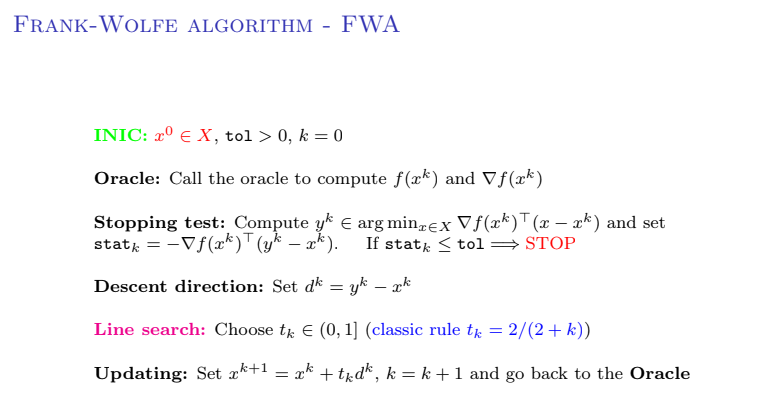

In [27]:
def FW(oracle,x0,H,yb,tol,MaxIt):
    it=0
    x=np.array(x0)
    g=oracle(x0,yb,H,3)
    y=x/2                   #comment calculer y ?
    stat=np.dot(y-x0,-g)
    while stat.all()>tol:
        t=2/(2+it)
        x=x+t*(y-x)
        y=x/2
        stat=np.dot(y-x,-g)
        if it>=MaxIt:
            break
        else:
            it+=1
    return x,it

5. Test de l'algorithme

In [28]:
#données
Hdf = pd.read_csv('H.csv')
ydf = pd.read_csv('y.csv')
H=Hdf.to_numpy()
y=ydf.to_numpy()
tau=24
tol=0.1
MaxIt=10**5

In [29]:
#calcul
# x5,it=FW(oracle5,[0]*1024,H,y,tol,MaxIt)
# print(f"nombre d'itérations = {it}")

In [30]:
#visualisation

#plt.bar([i for i in range(1024)],x5)
#plt.show()